In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
os.chdir('/content/gdrive/MyDrive/CourseDA')
os.listdir()

['train_mobile_price.csv',
 'test_mobile_price.csv',
 'loan_data.csv',
 'healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'diabetes_prediction_dataset.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'AIDS_Classification_50000.csv',
 'heart-dt.csv',
 'Churn_Modelling.csv',
 'bank.csv']

In [25]:
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# **Tentang Kumpulan Data**
**Konteks**\
Temukan strategi terbaik untuk ditingkatkan pada kampanye pemasaran berikutnya. Bagaimana lembaga keuangan dapat memiliki efektivitas yang lebih besar untuk kampanye pemasaran di masa depan? Untuk menjawab hal ini, kita harus menganalisis kampanye pemasaran terakhir yang dilakukan bank dan mengidentifikasi pola yang akan membantu kita menemukan kesimpulan untuk mengembangkan strategi masa depan.\
**Sumber**\
[Moro dkk., 2014] S. Moro, P. Cortez dan P. Rita. Pendekatan Berbasis Data untuk Memprediksi Keberhasilan Telemarketing Bank. Sistem Pendukung Keputusan, Elsevier, 62:22-31, Juni 2014

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [27]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

⚡🧊***data bersih gada missing, noise***🧠💻

In [28]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Deposit'],
      dtype='object')

In [29]:
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


***Bagaimana usia dan status pernikahan memengaruhi kemungkinan melakukan deposit?***

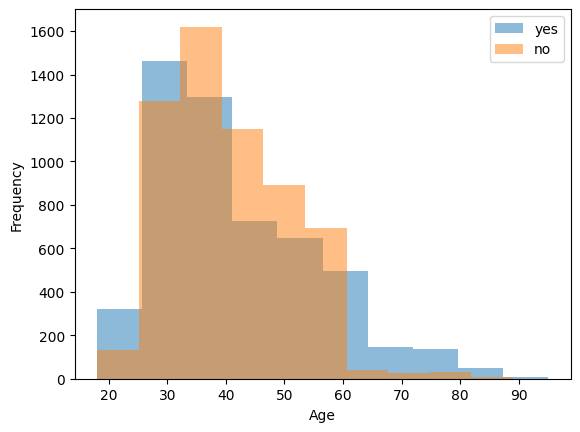

In [30]:
for i in ['yes','no']:
    ax = df[df.Deposit==i].Age.plot(kind='hist', alpha=0.5, legend=f'{i}', xlabel='Age')
ax.legend(['yes','no'])

<Axes: xlabel='Marital'>

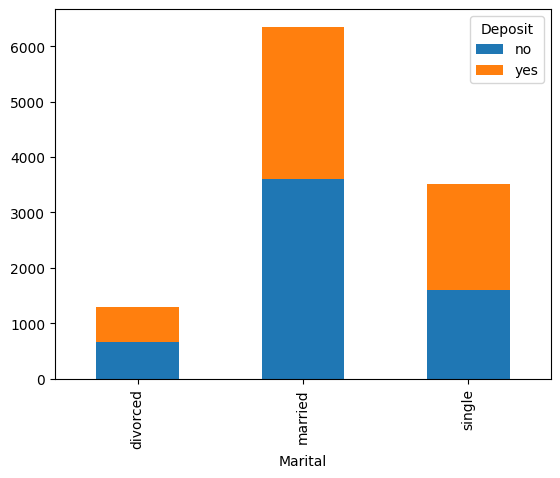

In [31]:
df.groupby(['Marital', 'Deposit']).Deposit.count().unstack().plot(kind='bar', stacked=True)

***Apakah kategori pekerjaan klien memengaruhi keputusan mereka untuk menyetor? Apakah ada profesi tertentu yang lebih cenderung melakukan deposito?***

<Axes: xlabel='Job'>

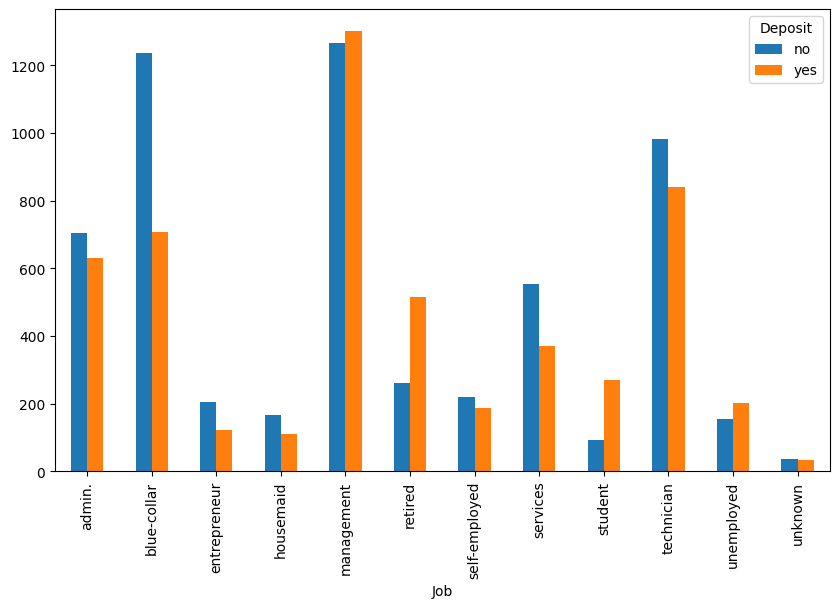

In [32]:
df.groupby(['Job', 'Deposit']).Deposit.count().unstack().plot(kind='bar', figsize=(10,6))

***Bagaimana korelasi saldo akun dengan kemungkinan deposit? Apakah saldo yang lebih tinggi dikaitkan dengan kecenderungan yang lebih tinggi untuk melakukan deposit?***

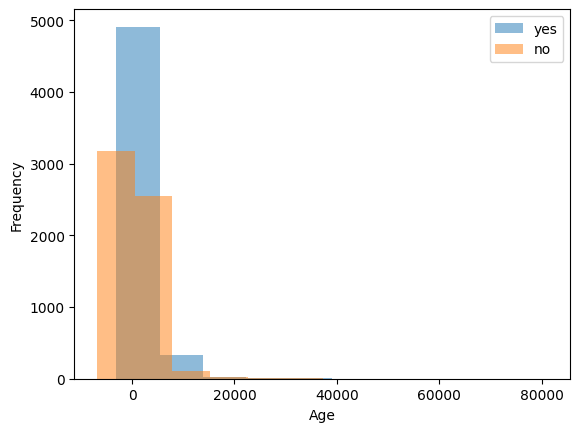

In [33]:
for i in ['yes','no']:
    ax = df[df.Deposit==i].Balance.plot(kind='hist', alpha=0.5, legend=f'{i}', xlabel='Age')
ax.legend(['yes','no'])

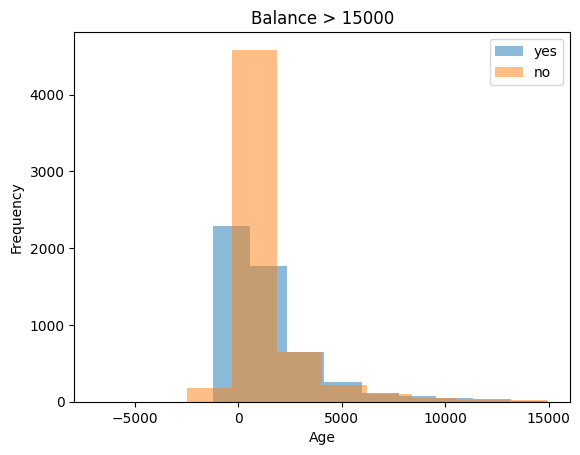

In [34]:
for i in ['yes','no']:
    ax = df[(df.Deposit==i)&(df.Balance<15000)].Balance.plot(kind='hist', alpha=0.5, legend=f'{i}', xlabel='Age', title='Balance > 15000')
ax.legend(['yes','no'])

***Bagaimana status pinjaman dan perumahan (memiliki hipotek atau pinjaman pribadi) memengaruhi keputusan untuk mendepositokan?***

In [35]:
df.groupby(['Housing', 'Deposit']).Deposit.count().unstack().style.background_gradient(cmap='Blues')

Deposit,no,yes
Housing,,
no,2527,3354
yes,3346,1935


***Apakah tingkat pendidikan mempengaruhi keputusan klien untuk melakukan deposit?***

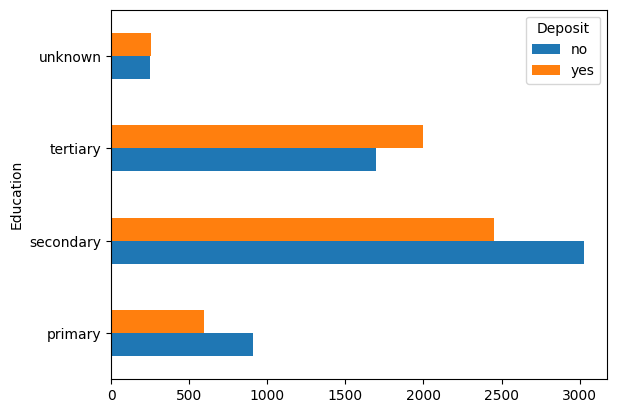

In [36]:
ax = df.groupby(['Education', 'Deposit']).Deposit.count().unstack().plot(kind='barh')

***How effective are the marketing campaigns in terms of the number of contacts made and the outcome (deposit)?***

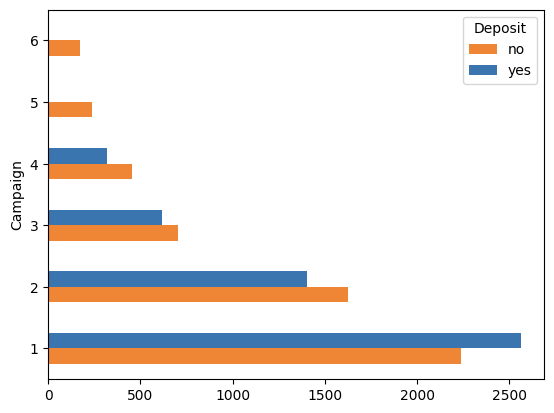

In [37]:
rev_viridis = ['#ef8636', '#3b75af']
ax = df.groupby(['Campaign', 'Deposit']).Deposit.count().nlargest(10).sort_values(ascending=True).unstack().plot(kind='barh', color=rev_viridis)

***Apakah metode kontak (mis. seluler, telepon, tidak dikenal) memengaruhi tingkat keberhasilan deposit?***

ef8636
ef8636

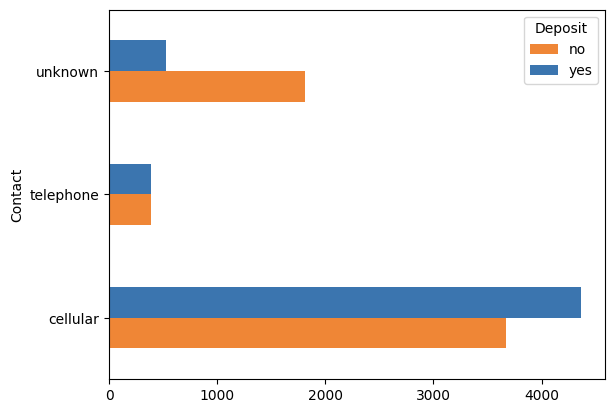

In [39]:
df.groupby(['Contact', 'Deposit']).Deposit.count().unstack().plot(kind='barh', color=rev_viridis)
# viridis
bars = ax.patches
color0 = bars[0].get_facecolor()
color1 = bars[3].get_facecolor()

for i in range(3):
    print(f'{int(color0[i]*255):x}', end='')
print()
for i in range(3):
    print(f'{int(color1[i]*255):x}', end='')

# swap
for i in range(0,3):
    bars[i].set_facecolor(color1)
for i in range(3,6):
    bars[i].set_facecolor(color0)

***Apakah ada bulan atau hari tertentu ketika klien lebih cenderung melakukan deposit?***

<Axes: xlabel='Month,Deposit'>

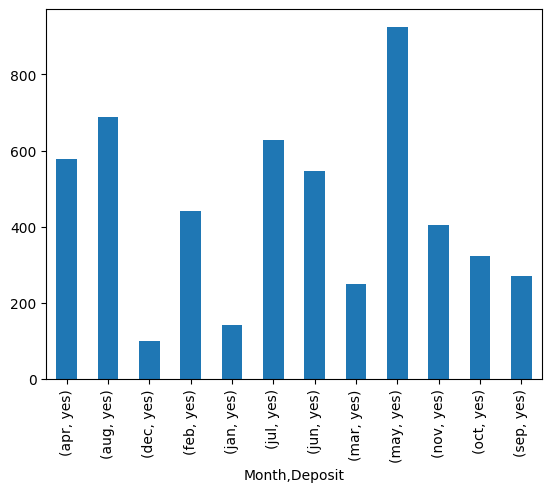

In [40]:
df[df.Deposit=='yes'].groupby(['Month', 'Deposit']).Deposit.count().plot(kind='bar')

***Bagaimana hasil dari kampanye pemasaran sebelumnya memengaruhi keputusan saat ini untuk melakukan deposit?***

In [41]:
df.groupby(['Previous','Poutcome']).Deposit.count()

Previous  Poutcome
0         unknown     8324
1         failure      402
          other        158
          success      326
          unknown        1
                      ... 
37        other          1
40        other          1
41        other          1
55        failure        1
58        other          1
Name: Deposit, Length: 70, dtype: int64

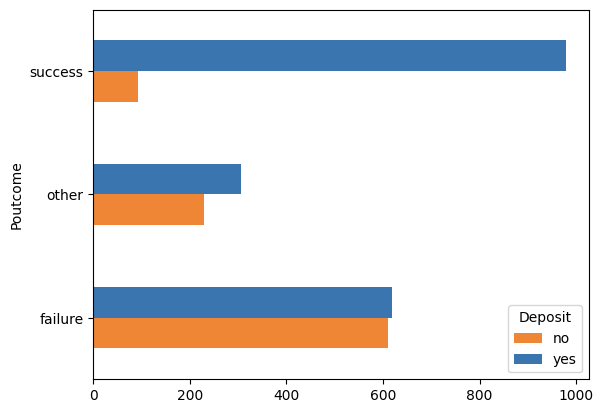

In [42]:
ax = df[df.Poutcome != 'unknown'].groupby(['Poutcome', 'Deposit']).Deposit.count().unstack().plot(kind='barh', color=rev_viridis)

***Apakah ada hubungan antara durasi kontak terakhir dan keputusan untuk melakukan deposit?***

<Axes: xlabel='Deposit_Numeric', ylabel='Duration'>

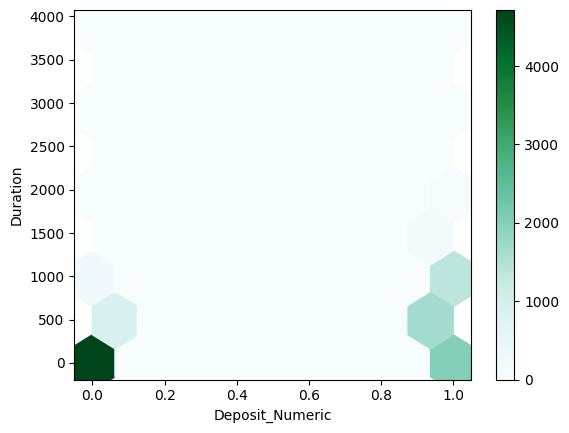

In [43]:
df['Deposit_Numeric'] = df.Deposit.apply(lambda x: 0 if x == 'no' else 1)
df.plot(kind='hexbin', x='Deposit_Numeric', y='Duration', gridsize=8)

<Axes: ylabel='Frequency'>

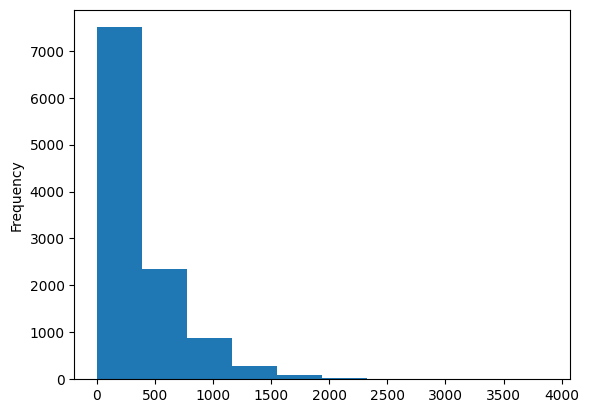

In [44]:
df.Duration.plot(kind='hist')

<Axes: xlabel='Deposit_Jitter', ylabel='Duration'>

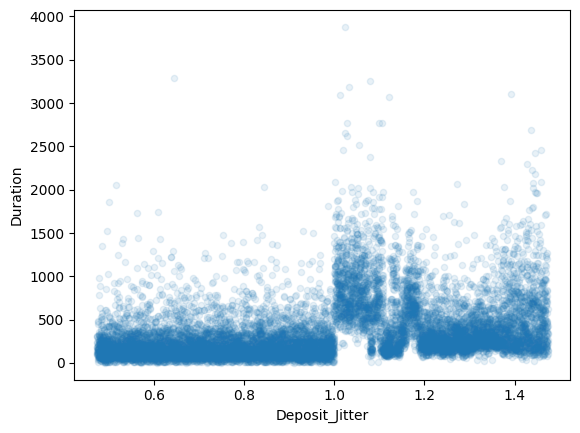

In [45]:
df['Deposit_Jitter'] = df.Deposit_Numeric + pd.Series(range(len(df))).sample(frac=1) / len(df)
df.plot(kind='scatter', x='Deposit_Jitter', y='Duration', alpha=0.1)